# Creat example plots for the simulation cases.


In [47]:
import numpy as np
from mlconfound.simulate import simulate_y_c_yhat, sigmoid
import seaborn as sns

N=1
n=10000

w_yc=2
w_yyhat=1
w_cyhat=0

## 1. all normal and linear

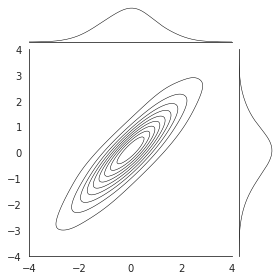

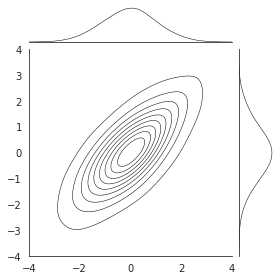

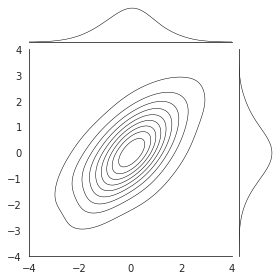

In [48]:
y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=1000,
                              random_state=42)

with sns.axes_style("white"):
    sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=y,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=c,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))

## 2. y|c non-normal

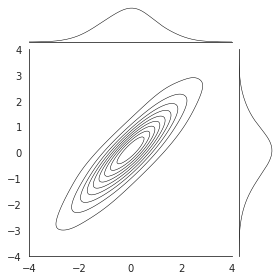

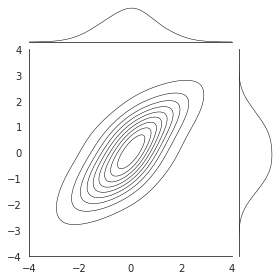

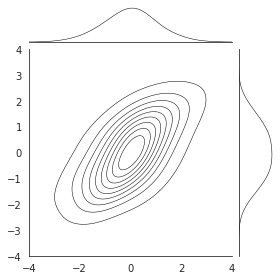

In [49]:
y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=1000,
                              random_state=42,
                              delta=0.5,
                              epsilon=0)
with sns.axes_style("white"):
    sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=y,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=c,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":2},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))

## y - yhat nonlinear


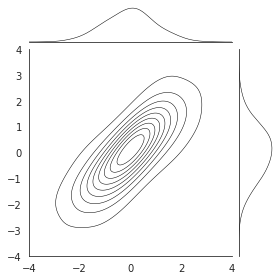

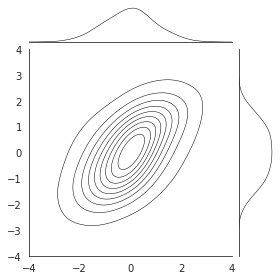

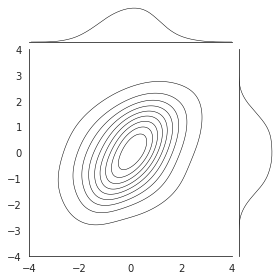

In [50]:
y, c, yhat =simulate_y_c_yhat(w_yc=w_yc,
                              w_yyhat=w_yyhat, w_cyhat=w_cyhat,
                              n=1000,
                              random_state=42,
                              delta=0.5,
                              epsilon=0,
                              nonlin_trf_fun=sigmoid)
with sns.axes_style("white"):
    sns.jointplot(x=y,y=c, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=y,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))
    sns.jointplot(x=c,y=yhat, kind="kde", height=4,
                  marginal_kws={"color":"black", "lw":0.5, "bw_adjust":1.5},
                  joint_kws={"colors":"black", "linewidths":0.5, "bw_adjust":2},
                  xlim = (-4,4), ylim = (-4,4))


# Simulations under the null

#### Run simulations (possibly in a HCP environment)
`./run_all.sh`

#### Load simulated results